#### The data set that we have have consists of chemical composition data for red and white wine. The goal is to be able to build a model that predicts  if the wine is red or white on the basis of the composition.

In [1]:
#Loading basic packages
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set(style = "darkgrid")

from matplotlib import rcParams
rcParams['figure.figsize'] = 11.7, 8.27

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [2]:
#read the data files
red_wine = pd.read_csv('/Users/raviswanath/Downloads/R-Course-HTML-Notes/R-for-Data-Science-and-Machine-Learning/Training Exercises/Machine Learning Projects/CSV files for ML Projects/winequality-red.csv', delimiter= ";")
white_wine = pd.read_csv('/Users/raviswanath/Downloads/R-Course-HTML-Notes/R-for-Data-Science-and-Machine-Learning/Training Exercises/Machine Learning Projects/CSV files for ML Projects/winequality-white.csv', delimiter= ";")

### Exploratory Analysis

In [3]:
red_wine.shape

(1599, 12)

In [4]:
white_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
fixed acidity           4898 non-null float64
volatile acidity        4898 non-null float64
citric acid             4898 non-null float64
residual sugar          4898 non-null float64
chlorides               4898 non-null float64
free sulfur dioxide     4898 non-null float64
total sulfur dioxide    4898 non-null float64
density                 4898 non-null float64
pH                      4898 non-null float64
sulphates               4898 non-null float64
alcohol                 4898 non-null float64
quality                 4898 non-null int64
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [5]:
red_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [6]:
red_wine["Wtype"] = "red"
white_wine["Wtype"] = "white"
df = red_wine.append(white_wine, ignore_index = True)

In [7]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Wtype
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
fixed acidity           6497 non-null float64
volatile acidity        6497 non-null float64
citric acid             6497 non-null float64
residual sugar          6497 non-null float64
chlorides               6497 non-null float64
free sulfur dioxide     6497 non-null float64
total sulfur dioxide    6497 non-null float64
density                 6497 non-null float64
pH                      6497 non-null float64
sulphates               6497 non-null float64
alcohol                 6497 non-null float64
quality                 6497 non-null int64
Wtype                   6497 non-null object
dtypes: float64(11), int64(1), object(1)
memory usage: 659.9+ KB


In [9]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


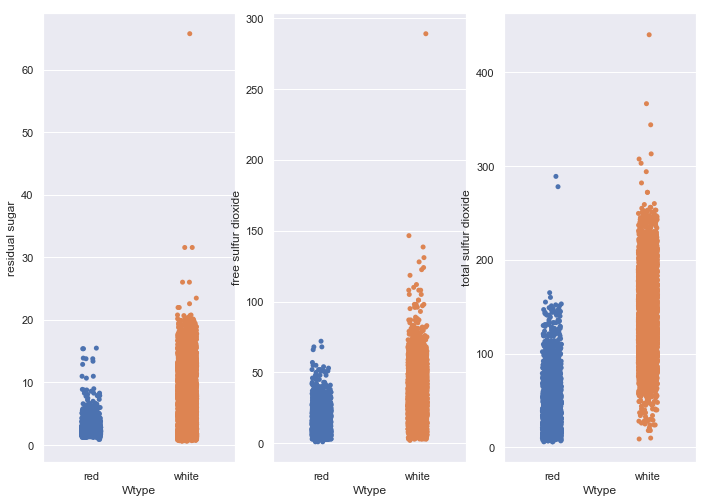

In [10]:
#plotting features with max values way out as comapred to the mean
rcParams['figure.figsize'] = 11.7, 8.27
plt.subplot(1,3,1)
sns.stripplot(y=df["residual sugar"], x=df["Wtype"])

plt.subplot(1,3,2)
sns.stripplot(y=df['free sulfur dioxide'], x=df["Wtype"])

plt.subplot(1,3,3)
sns.stripplot(y=df['total sulfur dioxide'],x=df["Wtype"])
plt.show()

The plot above clealry identifies outliers in white wine set w.r.t. residual sugar, free sulfur dioxide and total sulfur dioxide. Reoving them in the following lines.

In [11]:
df = df[df['total sulfur dioxide'] < 300]

In [12]:
df[(df['total sulfur dioxide'] > 200) & (df.Wtype == 'red')]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Wtype
1079,7.9,0.3,0.68,8.3,0.05,37.5,278.0,0.99316,3.01,0.51,12.3,7,red
1081,7.9,0.3,0.68,8.3,0.05,37.5,289.0,0.99316,3.01,0.51,12.3,7,red


In [13]:
#removing all data that has more than 3 standard deviations of total sulpfur content
df = df[((df['total sulfur dioxide'] - df['total sulfur dioxide'].mean())/df['total sulfur dioxide'].std()).abs() < 3]

#removing the sugar outlier
df = df[df['residual sugar'] < 40]

#dropping total sulfur dioxide outlier for red wine by index
df.drop([1079], inplace = True)

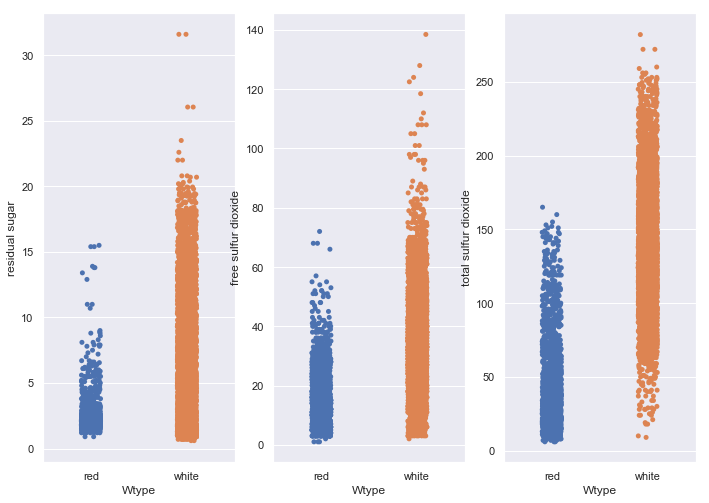

In [14]:
#checking to ensure that the dropping worked
plt.subplot(1,3,1)
sns.stripplot(y = df["residual sugar"], x =df["Wtype"])

plt.subplot(1,3,2)
sns.stripplot(y = df['free sulfur dioxide'], x =df["Wtype"])

plt.subplot(1,3,3)
sns.stripplot(y = df['total sulfur dioxide'],x= df["Wtype"])
plt.show()

### Learning:

- White wine has a wider variance with respect to sugar and sulfur content in comparision to red wine. This could potentially be used while modelling and making classifications.

[]

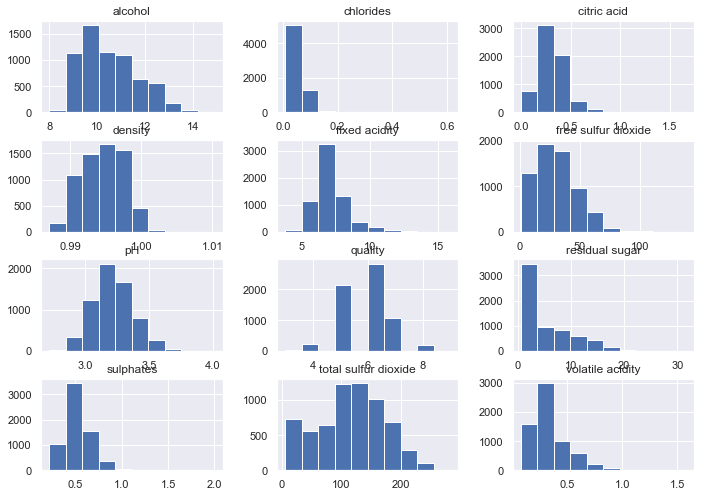

In [15]:
# distribuiton of all continuous variables in the data in one go
df.hist()
plt.plot()

In [16]:
df.isnull().sum()/len(df)

fixed acidity           0.0
volatile acidity        0.0
citric acid             0.0
residual sugar          0.0
chlorides               0.0
free sulfur dioxide     0.0
total sulfur dioxide    0.0
density                 0.0
pH                      0.0
sulphates               0.0
alcohol                 0.0
quality                 0.0
Wtype                   0.0
dtype: float64

In [17]:
# We have a stratified data set with more examples of white wine than red
df.Wtype.value_counts()/len(df)

white    0.753815
red      0.246185
Name: Wtype, dtype: float64

### Model Building

#### 1. Logistic Regression using scikit learn

In [18]:
# taking out the claasification class to avoid data leakage
class_of_wine = df.Wtype
df.drop(['Wtype'], axis = 1, inplace = True)

In [21]:
# use train test split to divide the data set 
# we use a stratified splitting to ensure the model is trained
# and tested ensuring the same proportion of classes as found in the original data set

X_train, X_test, y_train, y_test = train_test_split(df, class_of_wine, test_size=0.2, 
                                                    random_state=12, stratify=class_of_wine)



# fitting a simple logisitic regression model
clf = LogisticRegression(solver='liblinear', penalty='l2', dual=False, 
                         class_weight='balanced')

In [24]:
from sklearn.model_selection import cross_val_score
lr_model = cross_val_score(clf, X_train, y_train, 
                           cv=5)

In [25]:
# cross validated model accuracy
lr_model.mean()

0.9797630129853736

In [28]:
clf_model = clf.fit(X_train, y_train)
predictions_l2 = clf_model.predict(X_test)

In [29]:
from sklearn import metrics
metrics.confusion_matrix(y_test, predictions_l2)

array([[307,  13],
       [ 19, 959]])

In [30]:
# prediction probabilities
pred_probs = clf.predict_proba(X_test)

In [31]:
# model accuracy
clf.score(X_test, y_test)

0.975346687211094

In [32]:
clf.get_params()

{'C': 1.0,
 'class_weight': 'balanced',
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'max_iter': 100,
 'multi_class': 'warn',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'liblinear',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [33]:
def to_probs(p):
    if p == 'red':
        return 0
    else:
        return 1  

#### 2. Logistic Regression with statsmodels 

Using this API to get an idea of feature importances in the logistic regression model.

In [36]:
y_train_new = y_train.apply(to_probs)

In [37]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [38]:
import statsmodels.api as sm
model_obj = sm.Logit(y_train_new, X_train)
model_lr_sm = model_obj.fit()

Optimization terminated successfully.
         Current function value: 0.035895
         Iterations 11


In [39]:
np.exp(model_lr_sm.params)

fixed acidity           1.746217e-01
volatile acidity        3.838118e-06
citric acid             1.438037e+01
residual sugar          1.100638e+00
chlorides               2.204619e-18
free sulfur dioxide     9.271372e-01
total sulfur dioxide    1.082206e+00
density                 1.641791e+22
pH                      1.771720e-05
sulphates               3.909486e-05
alcohol                 1.756622e+00
quality                 9.196277e-01
dtype: float64

In [40]:
feature_importance = pd.DataFrame(model_lr_sm.params, columns = ['Importance'])

In [41]:
feature_importance.reset_index()

,index,Importance
0,fixed acidity,-1.745133
1,volatile acidity,-12.470528
2,citric acid,2.665864
3,residual sugar,0.095890
4,chlorides,-40.655977
5,free sulfur dioxide,-0.075654
6,total sulfur dioxide,0.079002
7,density,51.152660
8,pH,-10.940975
9,sulphates,-10.149520


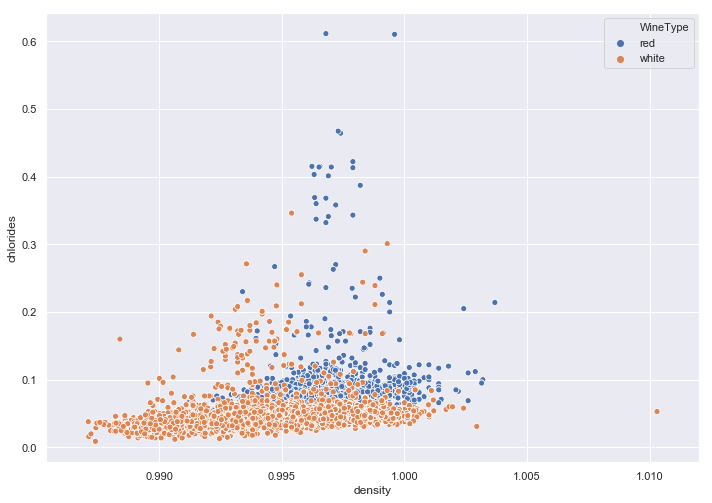

In [42]:
# plotting chlorides and density for both wine types
df['WineType'] = class_of_wine
sns.scatterplot( x = df['density'], y = df['chlorides'], hue = df['WineType'], data = df)
plt.show()

The model paramters give us valuable insights into which features play a pivotal role in classifying the wine types. The most significant ones seem to be density, chlorides, volatile acidity, pH and sulphates. 

### Classification using kNN (scikit)

In [43]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score

In [44]:
#scaling the data before applying kNN
X_scaled_train = StandardScaler().fit_transform(np.array(X_train))
X_scaled_test = StandardScaler().fit_transform(np.array(X_test))

#changing the y values from char to int
y_train = y_train.apply(to_probs)
y_test = y_test.apply(to_probs)

In [45]:
test_accuracy = []
train_accuracy = []

for k in range(1,50):
    
    #initiate kNN
    knn = KNeighborsClassifier(n_neighbors = k)
    
    #fit the data
    model = knn.fit(X_scaled_train, y_train)
    
    #make predictions and record scores
    train_accuracy.append(model.score(X_scaled_train,y_train))
    test_accuracy.append(model.score(X_scaled_test, y_test))

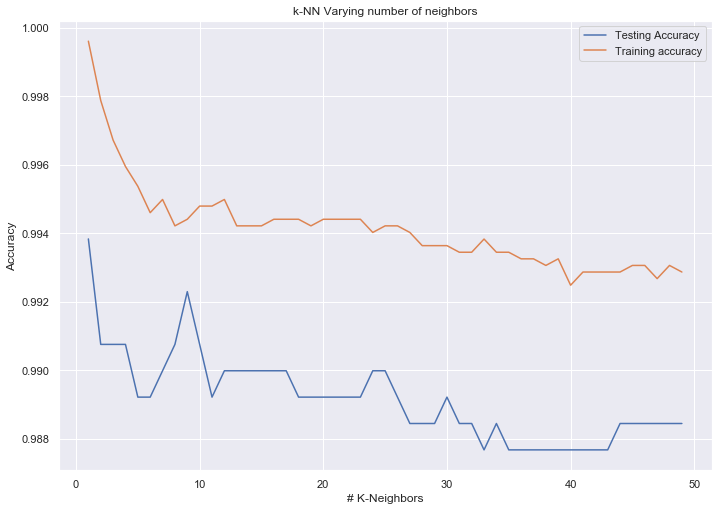

In [46]:
# Visualize Train/Test Performance
k = np.arange(1,50)
plt.title('k-NN Varying number of neighbors')
plt.plot(k, test_accuracy, label='Testing Accuracy')
plt.plot(k, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('# K-Neighbors')
plt.ylabel('Accuracy')
plt.show()

In [47]:
# using GridSearch and CV to find the optimal value of k
from sklearn.model_selection import GridSearchCV

param_grid = {'n_neighbors': np.arange(1,50)}

knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn, param_grid, cv=10)
knn_cv.fit(X_scaled_train, y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [48]:
knn_cv.best_score_

0.9944112545769898

In [49]:
knn_cv.best_params_

{'n_neighbors': 14}

In [50]:
best_knn_ = KNeighborsClassifier(n_neighbors = 14)
best_knn_model = best_knn_.fit(X_scaled_train, y_train)
predictions = best_knn_model.predict(X_scaled_test)

In [51]:
metrics.confusion_matrix(y_test, predictions)

array([[313,   7],
       [  6, 972]])

kNN performs better than logistic regression, as seen from the confusion matrix. 

### SVM model

In [52]:
from sklearn.svm import SVC

In [53]:
svm_model = SVC(C=1, kernel='linear', 
                random_state=10, class_weight='balanced')

In [54]:
svm_cv_score = cross_val_score(svm_model, X_train, y_train, cv=5)
svm_cv_score

array([0.98652551, 0.98845043, 0.98939248, 0.9855352 , 0.97782064])

In [55]:
svm_model.fit(X_train, y_train)
svm_predictions = svm_model.predict(X_test)
metrics.confusion_matrix(y_test, svm_predictions)

array([[311,   9],
       [ 11, 967]])

In [56]:
# using gridsearch to tune the hyperparameters
C_values = [int(x) for x in np.linspace(1, 10, 5)]
kernels = ['linear', 'rbf', 'sigmoid']
param_grid_svm = {"C": C_values,
                 "kernel": kernels}

In [61]:
svm_new_model = SVC(class_weight='balanced', random_state=10, kernel='rbf')
svm_grid_cv = GridSearchCV(svm_new_model, param_grid=param_grid_svm, 
                           cv=5, verbose=False)

In [64]:
import warnings
warnings.filterwarnings('ignore')
svm_grid_cv.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=10,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [1, 3, 5, 7, 10], 'kernel': ['linear', 'rbf', 'sigmoid']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=False)

In [65]:
svm_grid_cv.best_params_

{'C': 10, 'kernel': 'linear'}

In [66]:
best_svm_model = SVC(C=10, kernel='linear', class_weight='balanced',
                    random_state=10)
best_svm_model.fit(X_train, y_train)

SVC(C=10, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=10,
  shrinking=True, tol=0.001, verbose=False)

In [67]:
best_predictions = best_svm_model.predict(X_test)
metrics.confusion_matrix(y_test, best_predictions)

array([[313,   7],
       [ 11, 967]])

Performace has imporved after tuning the model, however, kNN seems to still be the best classifier. We can tune the SVM model even further by taking the C value further up high, however, that might lead to over fitting. 

---